In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
data = pd.read_csv('BTC-USD.csv')

# Data Scalling and lda

In [7]:
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
X = data_scaled[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = data_scaled['Date'].apply(lambda x: int(x[:4]))  # Assuming dates are in "YYYY-MM-DD" format
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

In [8]:
data_scaled.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03
mean,-4.539126e-16,-3.963653e-16,-1.096649e-16,3.160992e-16,3.160992e-16,1.112009e-16
std,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00,1.000161e+00
min,-8.049343e-01,-8.027165e-01,-8.063983e-01,-8.054589e-01,-8.054589e-01,-8.364513e-01
25%,-7.719923e-01,-7.720296e-01,-7.724937e-01,-7.723989e-01,-7.723989e-01,-8.311646e-01
50%,-3.599743e-01,-3.616314e-01,-3.572999e-01,-3.603886e-01,-3.603886e-01,-3.968736e-01
75%,3.445152e-01,3.486883e-01,3.386954e-01,3.459935e-01,3.459935e-01,5.832330e-01
max,3.392527e+00,3.363415e+00,3.443307e+00,3.393738e+00,3.393738e+00,1.685933e+01


In [9]:
data_scaled.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000322,0.999826,0.999416,0.999097,0.999097,0.717565
High,0.999826,1.000322,0.999320,0.999779,0.999779,0.721507
Low,0.999416,0.999320,1.000322,0.999686,0.999686,0.709453
Close,0.999097,0.999779,0.999686,1.000322,1.000322,0.716228
Adj Close,0.999097,0.999779,0.999686,1.000322,1.000322,0.716228
Volume,0.717565,0.721507,0.709453,0.716228,0.716228,1.000322


In [10]:
data_scaled.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999504,0.999095,0.998776,0.998776,0.717334
High,0.999504,1.000000,0.998998,0.999457,0.999457,0.721275
Low,0.999095,0.998998,1.000000,0.999364,0.999364,0.709225
Close,0.998776,0.999457,0.999364,1.000000,1.000000,0.715997
Adj Close,0.998776,0.999457,0.999364,1.000000,1.000000,0.715997
Volume,0.717334,0.721275,0.709225,0.715997,0.715997,1.000000


# Plotting the data with different plots

## Scatter plot

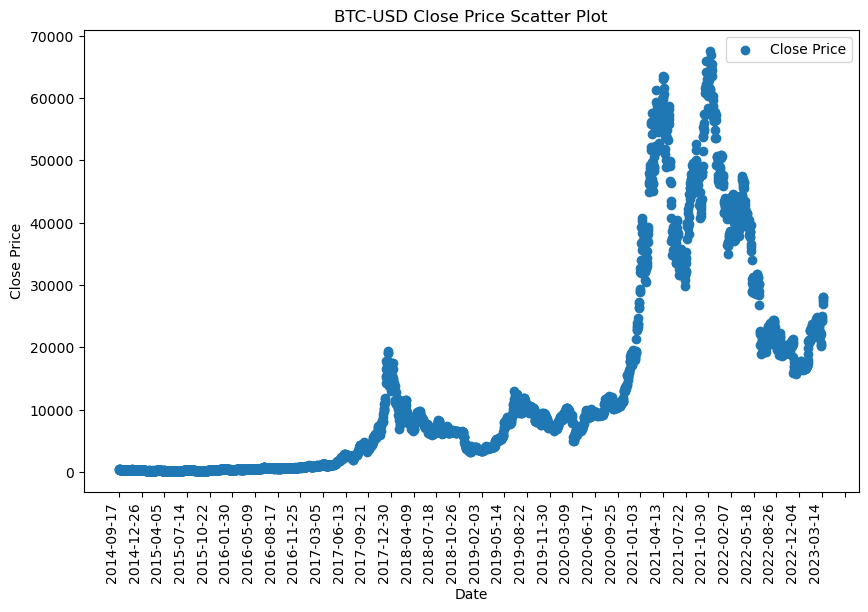

In [11]:
# d = data_scaled.iloc[:20]
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Close'], label='Close Price')
plt.xticks(rotation=90, ha='right')
plt.xticks([i for i in range(0,3300, 100)])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC-USD Close Price Scatter Plot')
plt.legend()
plt.show()

## Heatmap

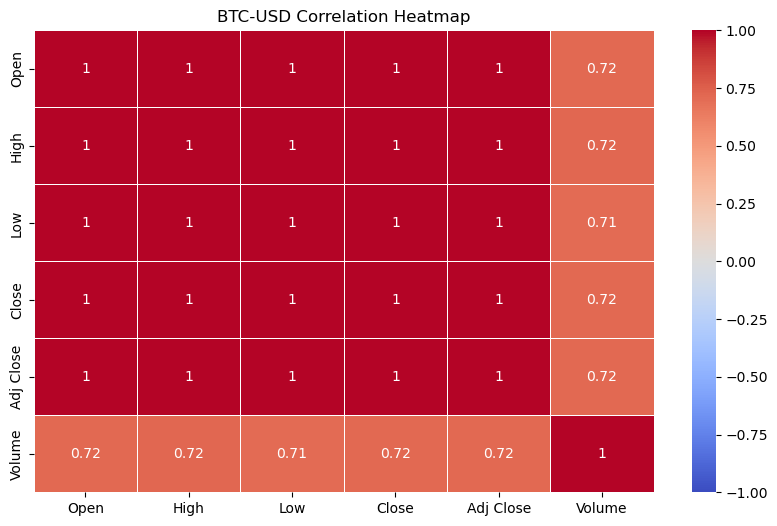

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('BTC-USD Correlation Heatmap')
plt.show()

<AxesSubplot:>

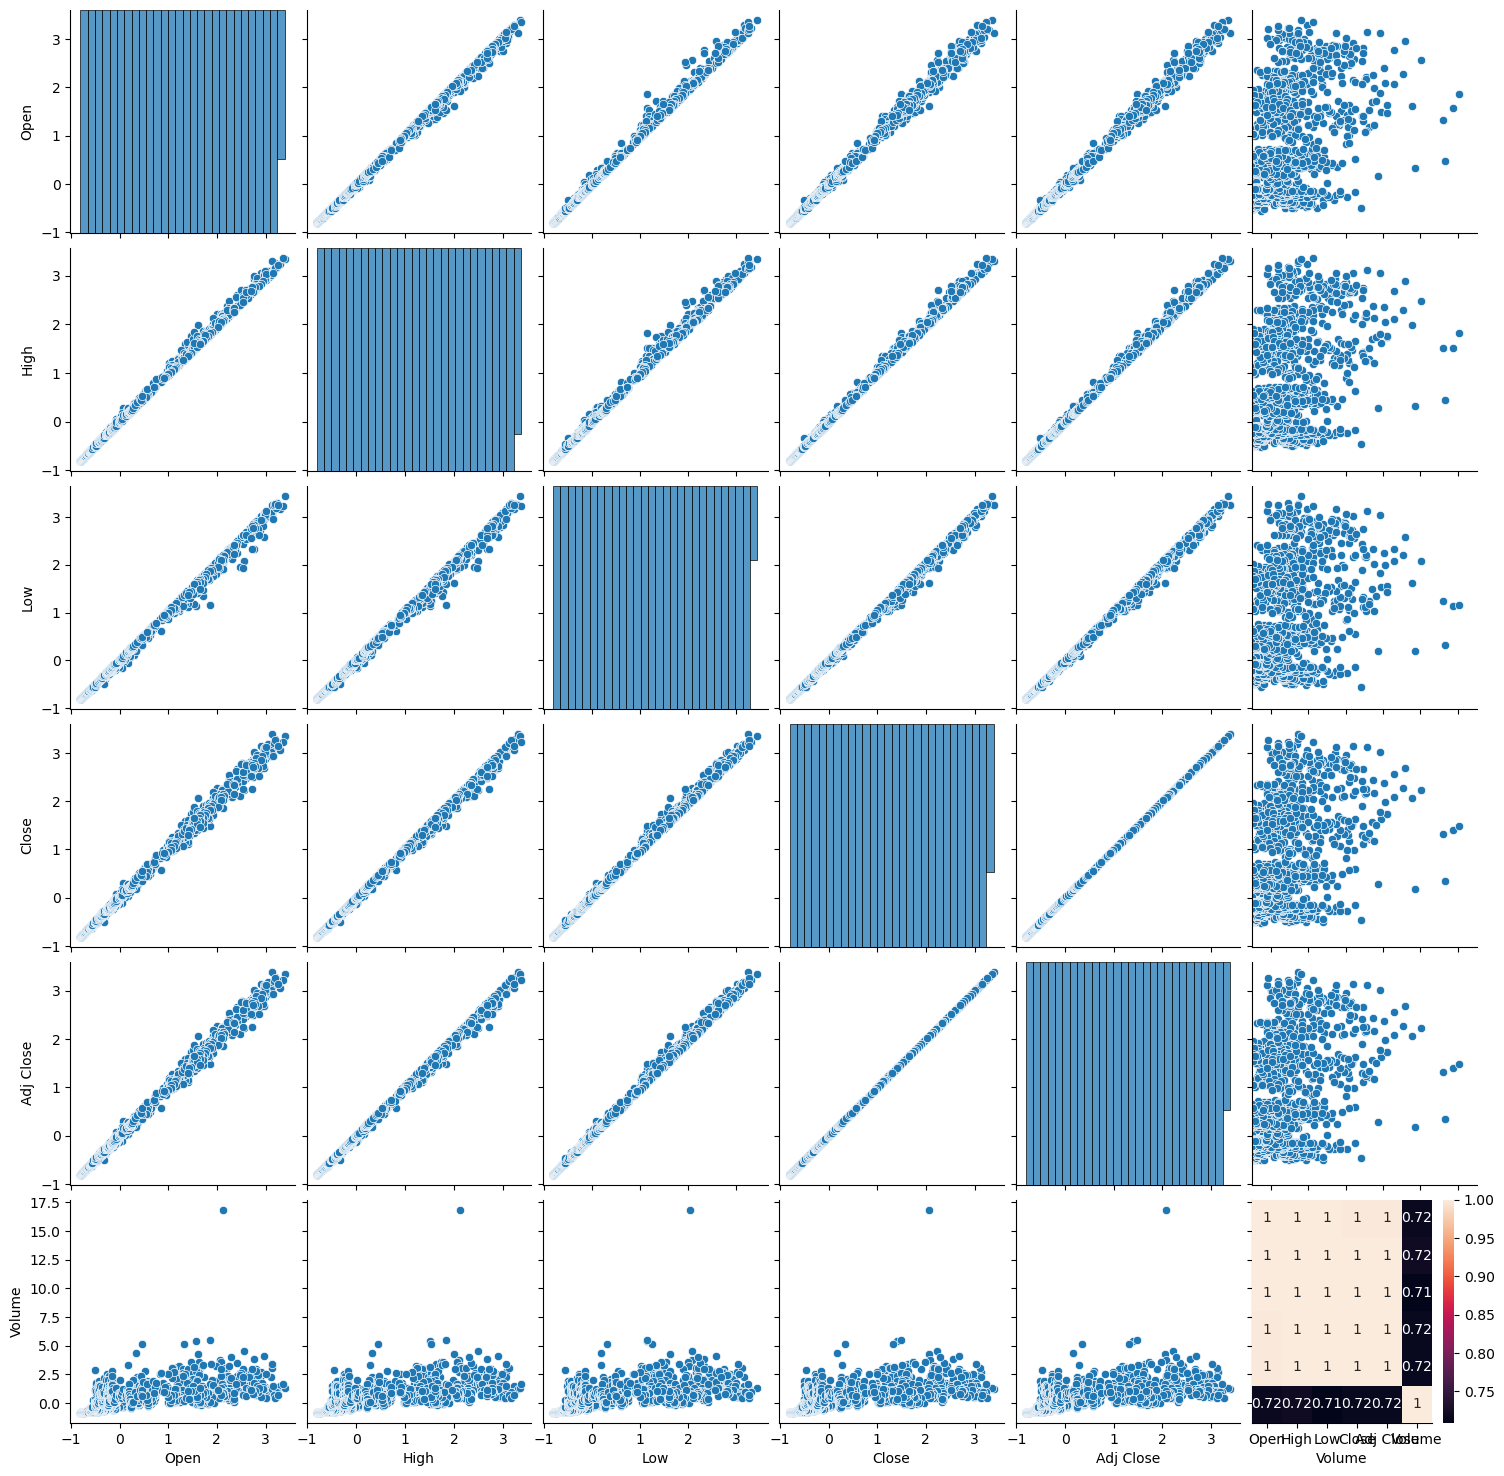

In [17]:
sns.pairplot(data_scaled, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
sns.heatmap(data_scaled.corr(), annot=True)

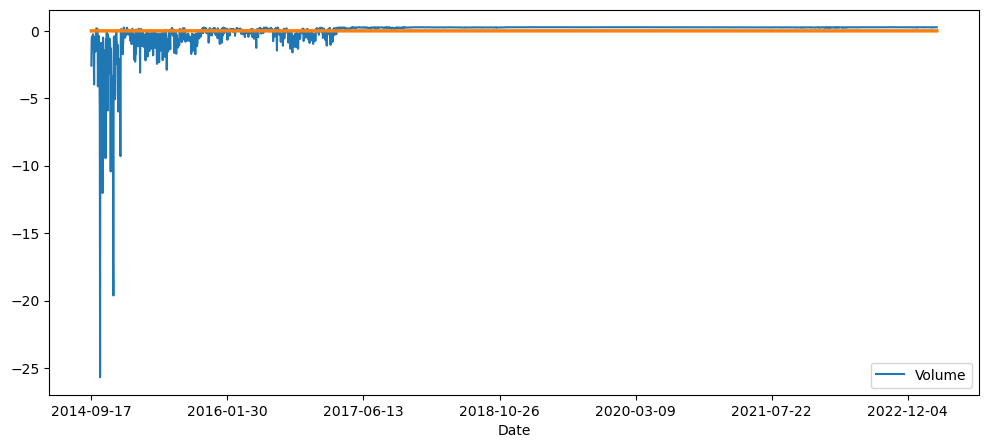

In [79]:
data_scaled.plot(x="Date", y="Volume")
btc_adj = data['Adj Close']
btc_adj.plot(lw=2.5, figsize=(12, 5))
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


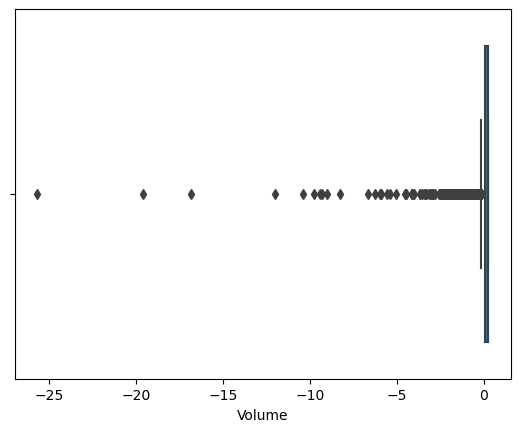

In [76]:
sns.boxplot(data_scaled.Volume)
plt.show()

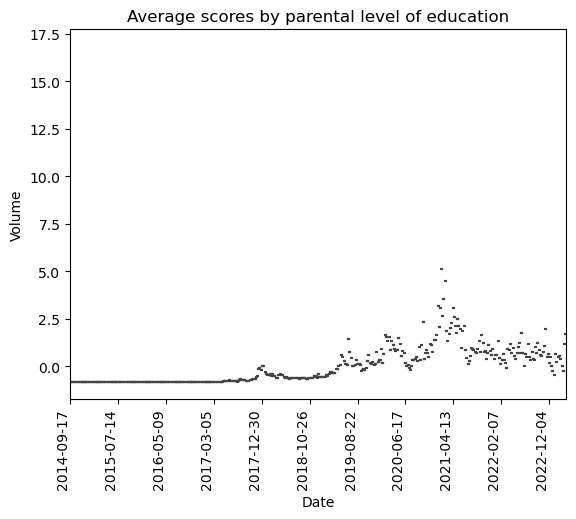

In [14]:
sns.boxplot(x="Date", y="Volume", data=data_scaled)
plt.xticks(rotation=0, ha='right')
plt.title("Average scores by parental level of education")
plt.xticks(rotation=90, ha='right')
plt.xticks([i for i in range(0,3300, 300)])
plt.ylabel("Volume")
plt.xlabel("Date")
plt.show()

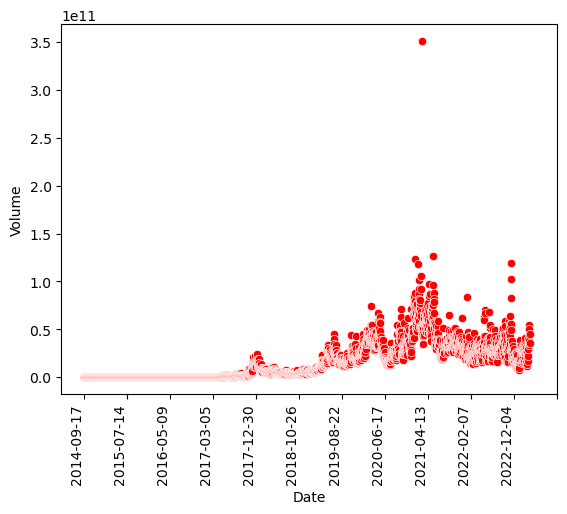

In [16]:
# date_min = min(Date)
sns.scatterplot(x="Date", y="Volume", data=data, color='red')
plt.xticks(rotation=90, ha='right')
plt.xticks([i for i in range(0,3600, 300)])
plt.xticks(rotation=90, ha='right')
plt.show()

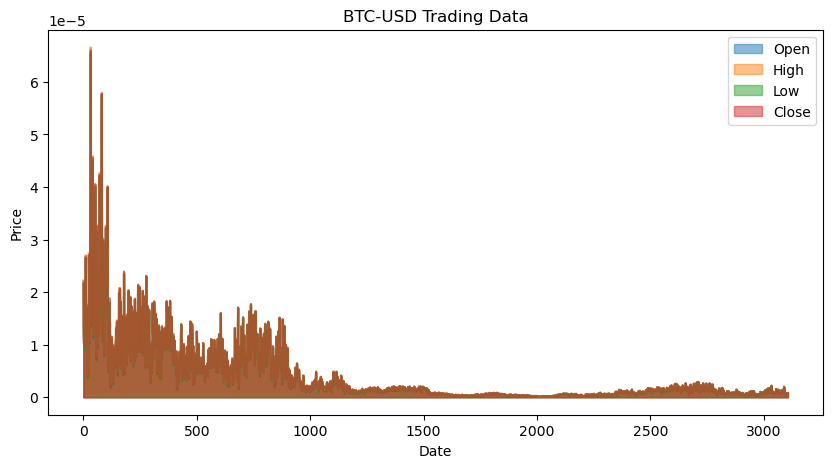

In [82]:
data.plot(kind='area', y=['Open', 'High', 'Low', 'Close'], stacked=False, alpha=0.5, figsize=(10, 5))

plt.title('BTC-USD Trading Data')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

<AxesSubplot:>

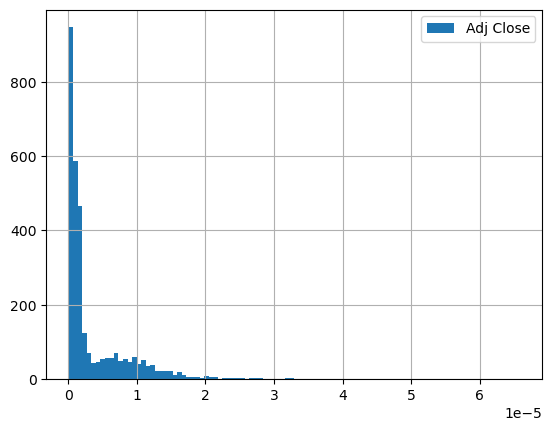

In [83]:
data['Adj Close'].hist(bins = 100, legend = True)
# data['Volume'].hist(bins= 100, legend = True)
# data['Volume'].plot(kind="hist")

([<matplotlib.axis.XTick at 0x1bba4383490>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32')])

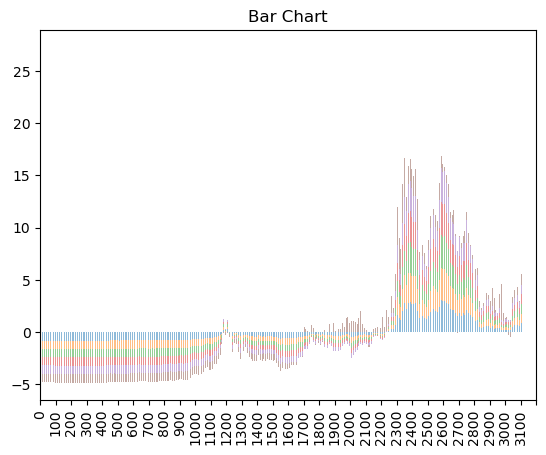

In [27]:
# data_scaled_subset = data_scaled.iloc[:20]
data_scaled.plot(kind='bar', stacked='True', alpha= 0.5, title="Bar Chart", legend=False)
plt.xticks([i for i in range(0,3300, 100)])

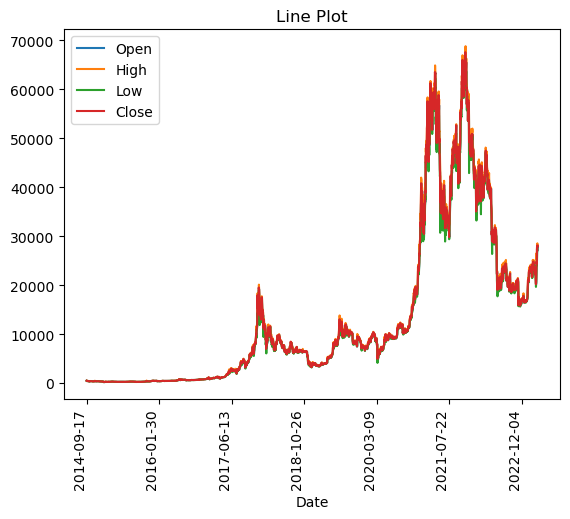

In [19]:
# Line plot
data.plot(x='Date', y=['Open', 'High', 'Low', 'Close'], linestyle='-')
plt.xticks(rotation=90, ha='right')
plt.title('Line Plot')
plt.show()

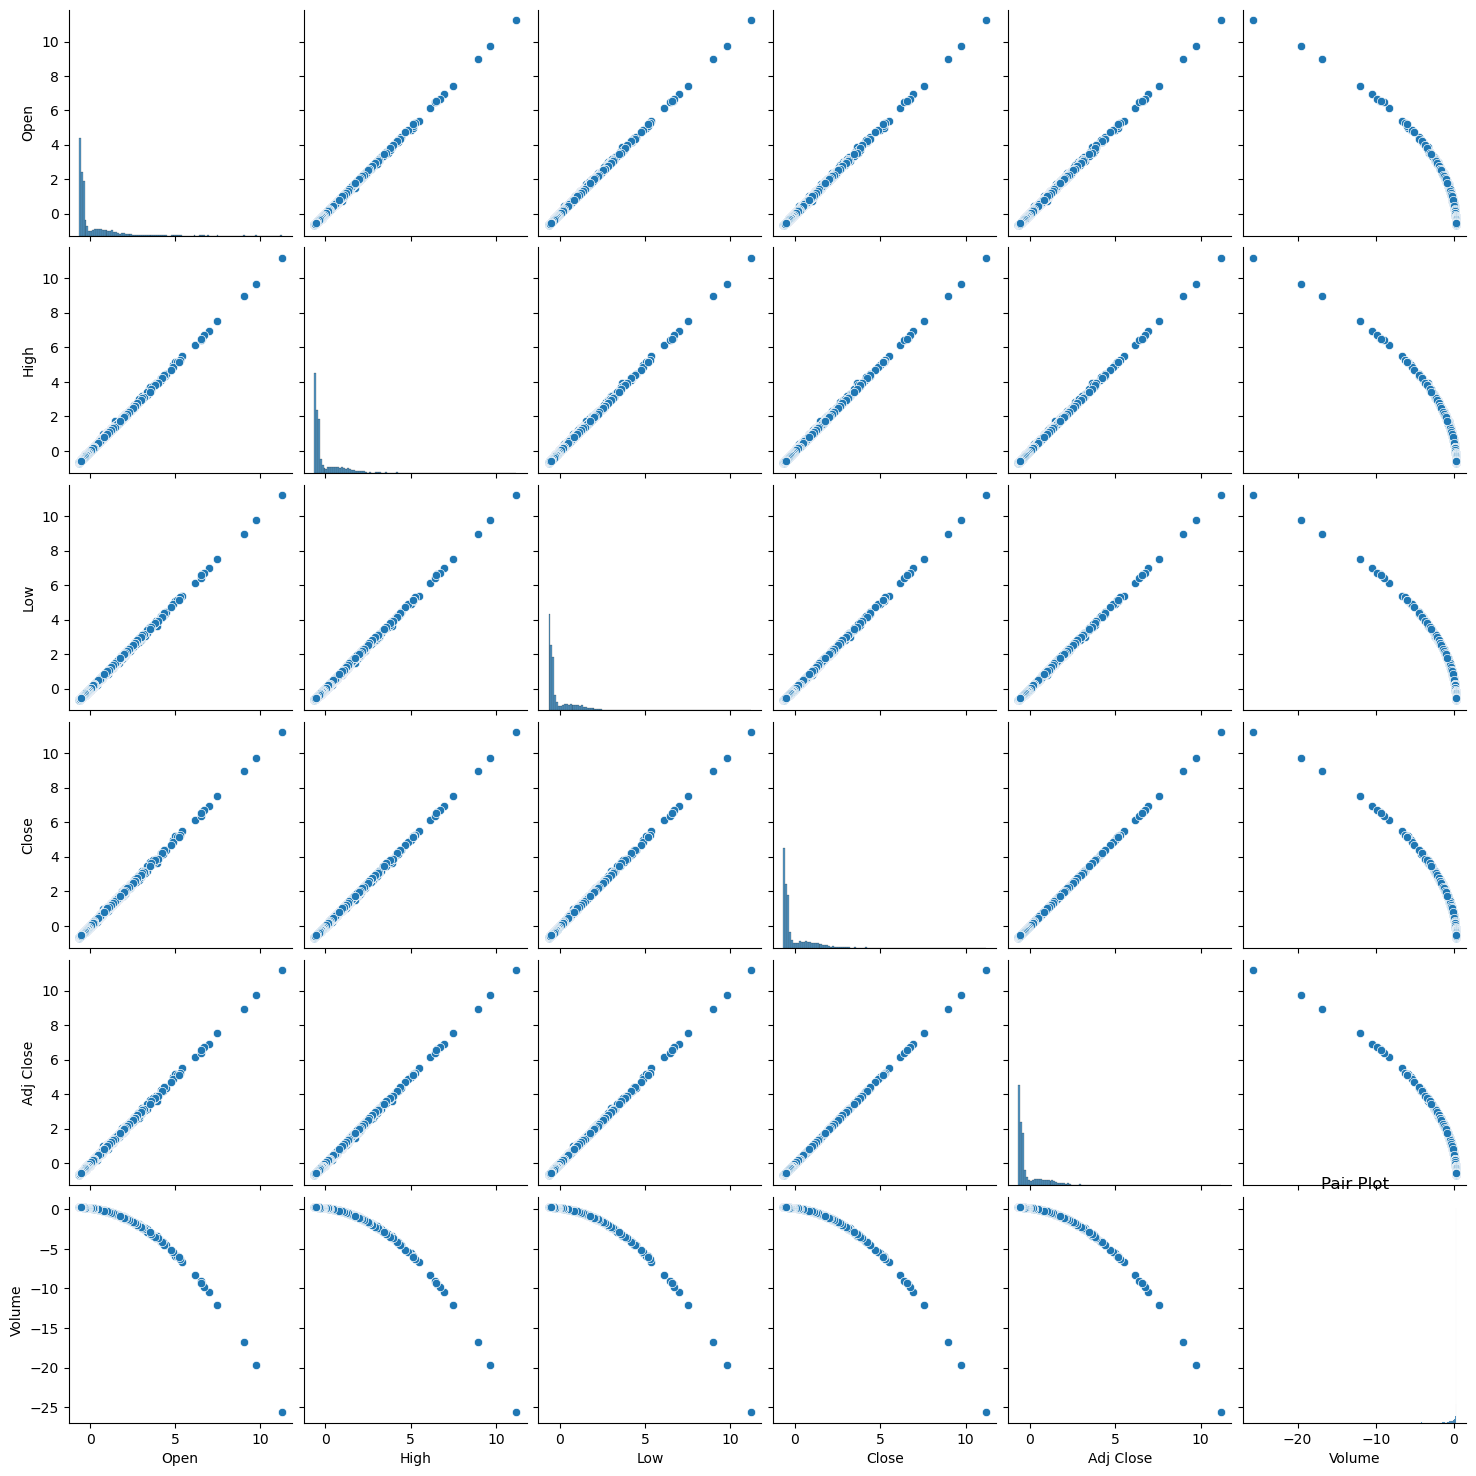

In [68]:
# Pair plot
sns.pairplot(data_scaled.drop('Date', axis=1))
plt.title('Pair Plot')
plt.show()

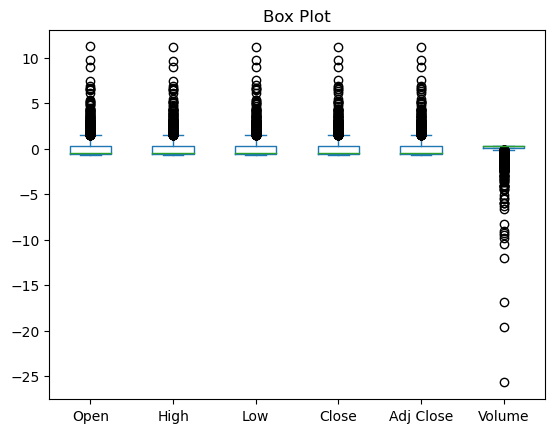

In [66]:
# Box plot
data_scaled.drop('Date', axis=1).plot.box()
plt.title('Box Plot')
plt.show()

### correlation matrix

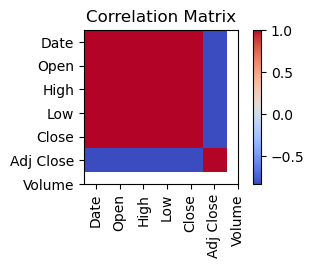

In [46]:
plt.figure(figsize=(4, 2))
plt.title('Correlation Matrix')
plt.imshow(data.corr(), cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()

# Displaying the dataset before preprocessing

In [52]:
data.shape

(4857377, 8)

In [114]:
data.head()
# data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000022,0.000022,0.000021,0.000022,0.000022,1.0
1,2014-09-18,0.000013,0.000013,0.000012,0.000012,0.000012,1.0
2,2014-09-19,0.000011,0.000011,0.000010,0.000010,0.000010,1.0
3,2014-09-20,0.000011,0.000011,0.000011,0.000011,0.000011,1.0
4,2014-09-21,0.000015,0.000016,0.000015,0.000015,0.000015,1.0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3108 entries, 0 to 3107
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3108 non-null   object 
 1   Open       3108 non-null   float64
 2   High       3108 non-null   float64
 3   Low        3108 non-null   float64
 4   Close      3108 non-null   float64
 5   Adj Close  3108 non-null   float64
 6   Volume     3108 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.8+ KB


In [14]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data cleaning

#### Check for unclean data

In [11]:
data.isna().any(axis=0)
# data.isna().any(axis=1)
# note: it has no null values (clean)

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
data.duplicated("Date").sum()

0

#### Remove unclean data

In [9]:
data.dropna(inplace=True) # Removing any rows with missing values
# data = data[data['Volume'] > -1] # Removing any rows with negative volume
data = data[data['Volume'] > -1] # Removing any rows with negative volume

In [8]:
df = data.dropna()
df.reset_index(inplace=True, drop=True)

#### changing the timestamp to a readable format 

In [77]:
# # For the historic data
# df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s') 
# df.head()

# Data Normalize

In [51]:
# cols_to_scale = ['Open','High','Low','Close','Adj Close','Volume']
# data[cols_to_scale] = normalize(data[cols_to_scale])
# data.head()

# Data scaling

In [19]:
# cols_to_scale = ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
# cols_to_scale = ['Open','High','Low','Close','Adj Close','Volume']
# scaler = MinMaxScaler()
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
# df.head()

# Statistics of the data

### Mean, Variance, standard deviation, min ...... etc

In [22]:
print("Statistics of the data:")
data.describe()

Statistics of the data:


,Open,High,Low,Close,Adj Close,Volume
count,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03
mean,3.801228e-06,3.862766e-06,3.740594e-06,3.803275e-06,3.803275e-06,1.000000e+00
std,5.545845e-06,5.606912e-06,5.482807e-06,5.540223e-06,5.540223e-06,4.191388e-10
min,6.766518e-08,7.872666e-08,5.538241e-08,7.502628e-08,7.502628e-08,1.000000e+00
25%,6.274171e-07,6.367223e-07,6.100165e-07,6.225502e-07,6.225502e-07,1.000000e+00
50%,1.410051e-06,1.442623e-06,1.374992e-06,1.414953e-06,1.414953e-06,1.000000e+00
75%,5.205969e-06,5.358979e-06,5.142384e-06,5.280064e-06,5.280064e-06,1.000000e+00
max,6.615088e-05,6.660484e-05,6.533983e-05,6.586210e-05,6.586210e-05,1.000000e+00


### covariance matrix

In [24]:
data.cov()

,Open,High,Low,Close,Adj Close,Volume
Open,3.075640e-11,3.109022e-11,3.040128e-11,3.071614e-11,3.071614e-11,-1.944869e-15
High,3.109022e-11,3.143746e-11,3.073333e-11,3.105825e-11,3.105825e-11,-1.964499e-15
Low,3.040128e-11,3.073333e-11,3.006118e-11,3.037227e-11,3.037227e-11,-1.924291e-15
Close,3.071614e-11,3.105825e-11,3.037227e-11,3.069407e-11,3.069407e-11,-1.942680e-15
Adj Close,3.071614e-11,3.105825e-11,3.037227e-11,3.069407e-11,3.069407e-11,-1.942680e-15
Volume,-1.944869e-15,-1.964499e-15,-1.924291e-15,-1.942680e-15,-1.942680e-15,1.756774e-19


## LDA

,Open,High,Low,Close,Adj Close,Volume
Open,1.000322,0.999826,0.999416,0.999097,0.999097,0.717565
High,0.999826,1.000322,0.999320,0.999779,0.999779,0.721507
Low,0.999416,0.999320,1.000322,0.999686,0.999686,0.709453
Close,0.999097,0.999779,0.999686,1.000322,1.000322,0.716228
Adj Close,0.999097,0.999779,0.999686,1.000322,1.000322,0.716228
Volume,0.717565,0.721507,0.709453,0.716228,0.716228,1.000322


## LDA way2

In [57]:
# LDA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
# lda2 = LDA(n_components=1)
# X_lda2 = lda2.fit_transform(X_pca, y)